### Simulação
.tran 0 0.00626 0.0 0.00001  
.ac oct 100000 1 10000000

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

k = 1000

### Carregando os dados

In [107]:
data = pd.read_csv('canal.txt', sep='	')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    86 non-null     float64
 1   V(EletrodoA,EletrodoB)  86 non-null     float64
 2   V(inamp)                86 non-null     float64
dtypes: float64(3)
memory usage: 2.1 KB


,time,"V(EletrodoA,EletrodoB)",V(inamp)
0,0.000000,0.000000e+00,0.002146
1,0.000001,9.412030e-07,0.002171
2,0.000002,1.882401e-06,0.002210
3,0.000004,2.823595e-06,0.002261
4,0.000005,3.764784e-06,0.002324


### Calculando o offset do sinal amplificado pelo ampficador de instrumentação na simulação:

No sinal de entrada simulado, quando t=0 V(EletrodoA,EletrodoB) deve ser 0V, então o offset igual o valor de V(inamp) no mesmo indice

In [108]:
offset = data['V(inamp)'].at[0]
print(f"Offset = {offset} V")

data['V(inamp)_no_offset'] = data['V(inamp)'] - offset
data.head()


Offset = 0.002145517 V


,time,"V(EletrodoA,EletrodoB)",V(inamp),V(inamp)_no_offset
0,0.000000,0.000000e+00,0.002146,0.000000
1,0.000001,9.412030e-07,0.002171,0.000026
2,0.000002,1.882401e-06,0.002210,0.000064
3,0.000004,2.823595e-06,0.002261,0.000115
4,0.000005,3.764784e-06,0.002324,0.000179


### Comparando o ganho calculado pela equação do datasheet com o ganho da simulação

A equação de ganho é dada por K = 1 + (100k/Rg)

K calculado = 100.00990099009901
Vout_calculado:
0     0.000000
1     0.000094
2     0.000188
3     0.000282
4     0.000377
        ...   
81   -0.012272
82   -0.008864
83   -0.005431
84   -0.001972
85    0.000440
Name: V(EletrodoA,EletrodoB), Length: 86, dtype: float64
Vout_simulado:
0     0.000000
1     0.000026
2     0.000064
3     0.000115
4     0.000179
        ...   
81   -0.012481
82   -0.009074
83   -0.005642
84   -0.002183
85    0.000230
Name: V(inamp)_no_offset, Length: 86, dtype: float64
0     0.000000
1     0.000068
2     0.000124
3     0.000167
4     0.000198
        ...   
81    0.000209
82    0.000210
83    0.000211
84    0.000211
85    0.000211
Length: 86, dtype: float64


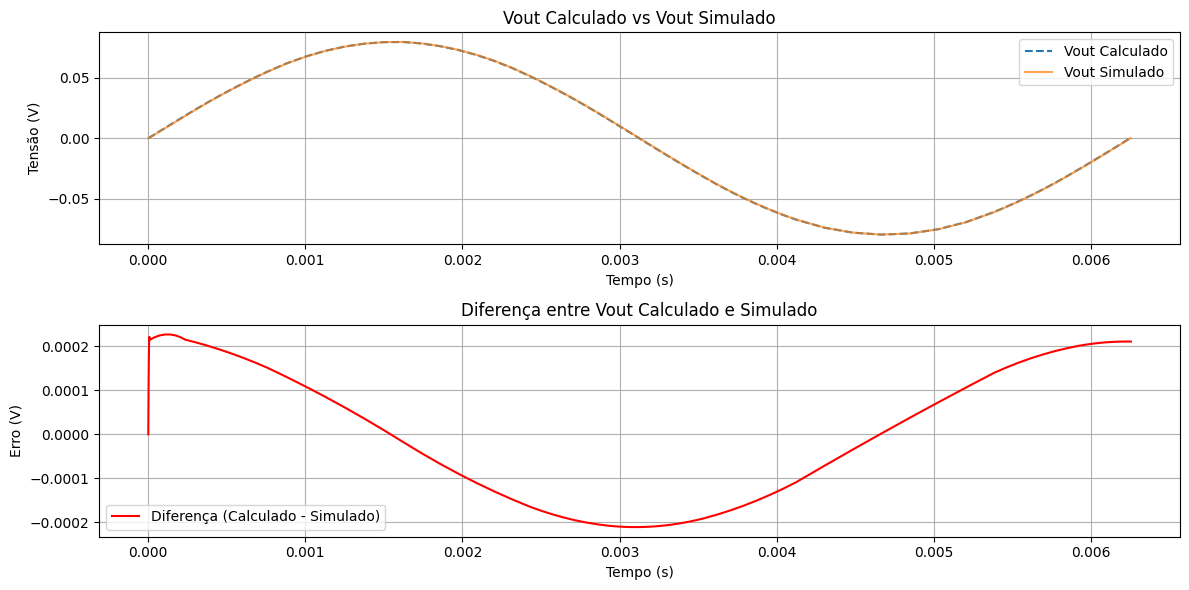

In [109]:
Rg = 1.01 * k
ganho = 1 + ((100 * k)/Rg)
print(f"K calculado = {ganho}")

V_ganho_calc = data['V(EletrodoA,EletrodoB)'] * ganho

print(f"Vout_calculado:\n{V_ganho_calc}")
print(f"Vout_simulado:\n{data['V(inamp)_no_offset']}")

diff = V_ganho_calc - data['V(inamp)_no_offset']
print(diff)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data['time'], V_ganho_calc, label='Vout Calculado', linestyle='--')
plt.plot(data['time'], data['V(inamp)_no_offset'], label='Vout Simulado', alpha=0.7)
plt.title('Vout Calculado vs Vout Simulado')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(data['time'], diff, label='Diferença (Calculado - Simulado)', color='red')
plt.title('Diferença entre Vout Calculado e Simulado')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro (V)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()